# Práctica 2

In [135]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [136]:
def carga_csv(file_name):
    valores = read_csv(file_name, header=None).to_numpy()
    return valores.astype(float)

In [137]:
def dataProcessing(datos):
    X = datos[:, :-1]
    Y = datos[:, -1]
    m = np.shape(X)[0]
    n = np.shape(X)[1]
    
    return X, Y, m, n

In [138]:
#Debe funcionar con un entero, un vector y una matriz. Para un vector y una matriz debe ser el resultado de aplicarle la
#función sigmoide a cada elemento del vector o la matriz.
def sigmoide(z):
    return (1.0/(1.0+np.exp(-z)))

In [139]:
def coste(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Term1 = np.matmul(y, np.log(H))
    Term2 = np.matmul((1 - y), np.log(1 - H))
    cost = (- 1 / (len(y))) * np.sum(Term1 + Term2)
    return cost

In [140]:
def gradiente(Theta, X, y):
    H = sigmoide(np.dot(X, Theta))
    Dif = H - y
    grad = (1 / len(y)) * np.matmul(Dif, X)
    return grad

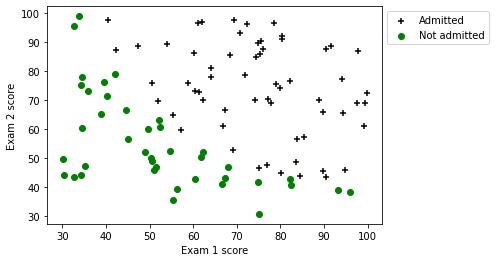

In [141]:
datos = carga_csv('ex2data1.csv')
X, Y, m, n = dataProcessing(datos)

pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='Admitted')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))


In [142]:
X_1 = np.hstack([np.ones([m, 1]), X])

In [143]:
Theta = np.zeros(n+1)

#print(Theta)
#print(X)
#print(Y)
c = coste(Theta, X_1, Y)
grad = gradiente(Theta, X_1, Y)
print('Coste = {}'.format(c))
print('Gradiente = {}'.format(grad))

Coste = 0.6931471805599452
Gradiente = [ -0.1        -12.00921659 -11.26284221]


In [144]:
result = opt.fmin_tnc(func=coste, x0=Theta, fprime=gradiente, args=(X_1,Y))
Theta_opt=result[0]
coste_opt = coste(Theta_opt, X_1, Y)
print('Coste = {}'.format(coste_opt))

Coste = 0.2034977015894742


  NIT   NF   F                       GTG
    0    1  6.931471805599452E-01   2.71082898E+02
    1    3  6.318123602631437E-01   7.89087138E-01
    2    5  5.892425253787787E-01   7.39226276E+01
    3    7  4.227824271444970E-01   1.85266106E+01
    4    9  4.072926933994032E-01   1.68671147E+01
    5   11  3.818854987081869E-01   1.07735045E+01
    6   13  3.786234899431667E-01   2.31584951E+01
tnc: stepmx = 1000
    7   16  2.389268133280452E-01   3.00821605E+00
    8   18  2.047203870922401E-01   1.52226276E-01
    9   20  2.046713887364524E-01   6.62493298E-02
   10   22  2.035303168599959E-01   9.30777857E-04
tnc: fscale = 32.7776
   11   24  2.035293527529622E-01   8.07314502E-06
   12   26  2.035251121514149E-01   1.80201329E-04
   13   28  2.034984102320014E-01   5.02793907E-04
   14   30  2.034978376531629E-01   9.87813968E-06
   15   32  2.034977904403664E-01   3.76851864E-06
   16   34  2.034977385394361E-01   1.93826971E-05
   17   36  2.034977015894742E-01   2.42863638E-13


In [145]:
def pinta_frontera_recta(X, Y, theta):
   # plt.figure()
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    x2_min, x2_max = X[:, 1].min(), X[:, 1].max()

    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max),
    np.linspace(x2_min, x2_max))

    h = sigmoide(np.c_[np.ones((xx1.ravel().shape[0], 1)),
    xx1.ravel(),
    xx2.ravel()].dot(theta))
    h = h.reshape(xx1.shape)

    # el cuarto parámetro es el valor de z cuya frontera se
    # quiere pintar
    plt.contour(xx1, xx2, h, [coste_opt], linewidths=1, colors='b')
    
    #plt.savefig("frontera.pdf")
    #plt.show()
    #plt.close()

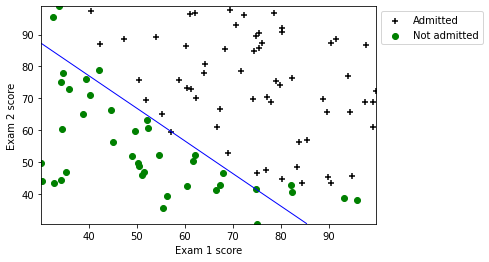

In [146]:
pinta_frontera_recta(X, Y, Theta_opt)

pos_plus = np.where(Y==1)
pos_min = np.where(Y==0)

plt.scatter(X[pos_plus, 0], X[pos_plus, 1], marker ='+', c='k', label ='Admitted')
plt.scatter(X[pos_min, 0], X[pos_min, 1], c='green', label = 'Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc = 'best', bbox_to_anchor=(1,1))

In [156]:
def evaluacion(theta, X, Y):
    prediccion = sigmoide(np.matmul(theta, np.transpose(X)))
    prediccion[prediccion >= 0.5] = 1
    prediccion[prediccion < 0.5] = 0
    porcentaje = np.asarray(np.where(prediccion == Y)).size
    return  (porcentaje / len(Y))*100

In [157]:
porcentaje_aciertos = evaluacion(Theta_opt, X_1, Y)
print("El porcentaje de ejemplos de entrenamientos que se clasifican correctamente es: {}".format(porcentaje_aciertos))

El porcentaje de ejemplos de entrenamientos que se clasifican correctamente es: 89.0
